In [2]:
#All required imports
import os
import pathlib
from os import listdir
from numpy import asarray
from keras.utils import img_to_array
from keras.utils import load_img
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import layers, Sequential, Model
from flask import Flask, flash, request, redirect, url_for, render_template
from werkzeug.utils import secure_filename
import tensorflow as tf
# tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly
from keras.utils import image_dataset_from_directory
import imageio
import cv2
import glob
from tensorflow import keras
from keras.utils import image_dataset_from_directory


In [8]:
#Required models
T1_model = tf.keras.models.load_model('D:\Projects\MRIfix\Backend\Trial\T1_model')
T2_model = tf.keras.models.load_model('D:\Projects\MRIfix\Backend\Trial\T2_model')

In [9]:
# Setting input image sizes 
IMG_HEIGHT = 217
IMG_WIDTH = 181
# Setting default batch size 
BATCH_SIZE = 64
# Defining the path for the data
base_dir = pathlib.Path('D:/Projects/MRIfix/Backend/Trial/static')
# base_dir = pathlib.Path("C:/Users/DELL/Desktop/Final_Year_Project/MRI_Style_Transfer_using_CycleGAN")
os.chdir(base_dir)
data_dir = pathlib.Path(str(base_dir) + '/uploads/')

In [10]:
def load_image(path, filename, size=(256,256)):
    data_list = list()     
    pixels = load_img(path + filename, target_size=size)
    pixels = img_to_array(pixels)
    data_list.append(pixels)
    return asarray(data_list)

In [11]:
# Define normalization function - Normalizing data in the range [-1.0, 1.0]
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(scale = 1./127.5, offset =-1.0)
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(scale = 1./127.5, offset =-1.0)

# Define resizing function
resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(128, 128, interpolation='bilinear')
# resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(128, 128, interpolation='bilinear')



In [12]:
#Reshape
reshape_layer = layers.Reshape((128,128,1))
# reshape_layer = keras.layers.Reshape((128,128,1))

In [19]:
def generate_images_T1(model1, test_input1,filename):
    prediction1 = model1(test_input1)
    # prediction2 = model2(test_input2)
    plt.figure(figsize=(4, 4))
    display_list = [prediction1[0]]
    title = ['Predicted T2 ']
    for i in range(1):
        plt.subplot(1, 1, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i].numpy()[:, :, 0], cmap='gray')
        plt.axis('off')
    # plt.savefig('./generated_images/image_at_epoch_{:04d}.png'.format(epoch))
    # plt.show()
    save_results_to = 'D:/Projects/MRIfix/Backend/Trial/static/uploads/'
    plt.savefig(save_results_to + 'Result_' + filename,  bbox_inches="tight", transparent="true")
    plt.show()
    print("\n")
    return ('Result_' + filename)

In [28]:
#Loading the file
filename = 'Image10.png'
file_0 = load_image("D:/Projects/MRIfix/Backend/Model_Integration/static/uploads/", filename)

In [29]:
type(file_0)

numpy.ndarray

In [30]:
#Normalizing the loaded file
images_T1_norm = normalization_layer(file_0)

In [31]:
type(images_T1_norm)

tensorflow.python.framework.ops.EagerTensor

In [32]:
print("Minimum and maximum pixel values after normalization")
print(np.min(images_T1_norm), np.max(images_T1_norm))

Minimum and maximum pixel values after normalization
-1.0 1.0


In [33]:
# Resizing the normalized data
images_T1_resized =resize_layer(images_T1_norm)

In [34]:
print(type(images_T1_resized))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [35]:
print(np.min(images_T1_resized), np.max(images_T1_resized))

-1.0 0.9176472


In [39]:
#Reshape the resized data
images_T1_reshaped = reshape_layer(images_T1_resized[:,:,:,0])

In [40]:
print("Type of images_T1_reshaped:", type(images_T1_reshaped))

Type of images_T1_reshaped: <class 'tensorflow.python.framework.ops.EagerTensor'>


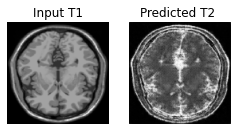



Result_Image10.png


In [44]:

a = generate_images_T1(T2_model, images_T1_reshaped, filename)
# a =  generate_images(T2_model, sample_T1_data, T1_model, sample_T2_data, 1)
print(a)

In [20]:
#Loading the file
filename = 'Image10.png'
file_0 = load_image("D:/Projects/MRIfix/Backend/Trial/static/uploads/", filename)
#Normalizing the loaded file
images_T1_norm = normalization_layer(file_0)
# Resizing the normalized data
images_T1_resized =resize_layer(images_T1_norm)
#Reshape the resized data
images_T1_reshaped = reshape_layer(images_T1_resized[:,:,:,0])


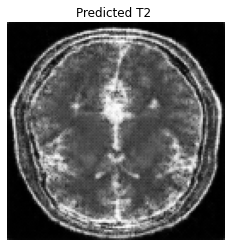



Result_Image10.png


In [21]:

a = generate_images_T1(T2_model, images_T1_reshaped, filename)
# a =  generate_images(T2_model, sample_T1_data, T1_model, sample_T2_data, 1)
print(a)

In [ ]:
# file1 = tf.image.rgb_to_grayscale(file_0)
# print(type(file1))
# file_final= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(file1))
# Loading T1 images
# images_T1 = image_dataset_from_directory(data_dir, seed = 123, shuffle = True, labels = None,image_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE)

# Normalizing T1 data
# images_T1_norm = images_T1.map(lambda x: (normalization_layer(x)))
images_T1_norm = normalization_layer(file_0)
print("Minimum and maximum pixel values after normalization")
print(np.min(images_T1_norm), np.max(images_T1_norm))

# Resizing T1 data
# images_T1_resized = images_T1_norm.map(lambda x: (resize_layer(x)))
images_T1_resized =resize_layer(images_T1_norm)
print(type(images_T1_norm))

# np_array = np.array(images_T1_resized) 
# print("Shape of resized images: ",images_T1_resized.shape,"\n")

#Reshape T1 data
# images_T1_reshaped = images_T1_resized.map(lambda x : reshape_layer(x[:,:,:,0]))
images_T1_reshaped = reshape_layer(images_T1_resized)
# np_array = np.array(images_T1_reshaped) 
# print("Shape of reshaped images: ",np_array.shape,"\n")
print("Type of images_T1_reshaped:", type(images_T1_reshaped))


# Convert to tensor
file_final= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(images_T1_reshaped))

a = generate_images_T1(T2_model, file_final , filename)
# a =  generate_images(T2_model, sample_T1_data, T1_model, sample_T2_data, 1)
print(a)

In [22]:
#Loading the original T2 file
filename = 'Image70.png'
file_0 = load_image("D:/Projects/MRIfix/Backend/Trial/static/uploads/", filename)

In [23]:
#Loading the original T2 file
filename = 'Result_Image10.png'
file_1 = load_image("D:/Projects/MRIfix/Backend/Trial/static/uploads/", filename)

In [24]:
m = tf.keras.metrics.Accuracy()
m.update_state(file_0,file_1)
print('Final result: ', m.result().numpy())

Final result:  0.03555298
